<h1 align='center'><b><font color='indianred'></p>Spam Detection using Sparse Embeddings</b></h1>

In [1]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.

    !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download "uciml/sms-spam-collection-dataset"
    !unzip sms-spam-collection-dataset.zip

In [2]:
import pandas as pd
if 'google.colab' in str(get_ipython()):
    spam_df = pd.read_csv('spam.csv', encoding='latin-1')
else:
    spam_df = pd.read_csv('/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/spam.csv', encoding='latin-1')
spam_df = spam_df[['v1','v2']]
spam_df.columns = ['label', 'message']
spam_df.head()

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_70486/1337418617.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
spam_df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
spam_df['label'].value_counts(normalize=True)*100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

In [5]:
spam_df['label'].replace({'ham':0, 'spam':1}, inplace=True)

/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_70486/1359867004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spam_df['label'].replace({'ham':0, 'spam':1}, inplace=True)
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_70486/1359867004.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [6]:
spam_df['label'].value_counts(normalize=True)*100

label
0    86.593683
1    13.406317
Name: proportion, dtype: float64

In [7]:
spam_df['label'].value_counts(normalize=True)*100

label
0    86.593683
1    13.406317
Name: proportion, dtype: float64

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
X = spam_df['message'].values
y = spam_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,shuffle=True)
print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
print(y_test[:5])

['Today my system sh get ready.all is well and i am also in the deep well'
 'Its a valentine game. . . Send dis msg to all ur friends. .. If 5 answers r d same then someone really loves u. Ques- which colour suits me the best?rply me'
 'What is important is that you prevent dehydration by giving her enough fluids'
 'Nowadays people are notixiquating the laxinorficated opportunity for bambling of entropication.... Have you ever oblisingately opted ur books for the masteriastering amplikater of fidalfication? It is very champlaxigating, i think it is atrocious.. Wotz Ur Opinion???? Junna'
 'Pls she needs to dat slowly or she will vomit more.']
[0 0 0 0 0]
['What Today-sunday..sunday is holiday..so no work..'
 'I am in hospital da. . I will return home in evening'
 'Do you want bold 2 or bb torch'
 'I am great princess! What are you thinking about me? :)'
 'i can call in  &lt;#&gt;  min if thats ok']
[0 0 0 0 0]


In [9]:
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !pip install -U scikit-optimize -qq
    !python -m spacy download en_core_web_sm -qq
    !pip install pyspellchecker -qq
    !pip install optuna -qq

    basepath = '/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing'
    sys.path.append('/content/drive/MyDrive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files')
else:
    basepath = '/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/'
    sys.path.append(
        '/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files')

In [10]:
from pathlib import Path
base_folder = Path(basepath)
data_folder = base_folder/'0_Data_Folder'
model_folder = base_folder/'models/spam'
custom_functions = base_folder/'custom-functions'

In [11]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy_w_SpellChecker import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [13]:
cpp = cp.SpacyPreprocessor(model = 'en_core_web_sm', batch_size=500)

In [14]:
X_train_cleaned_bow = cpp.transform(X_train)
X_test_cleaned_bow = cpp.transform(X_test)

/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Custom_files/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [15]:
# Import the joblib library for saving and loading models
import joblib
import os

file_X_train_cleaned_bow = data_folder / 'x_train_cleaned_bow_small.pkl'
os.makedirs(os.path.dirname(file_X_train_cleaned_bow), exist_ok=True)
joblib.dump(X_train_cleaned_bow, file_X_train_cleaned_bow)

file_X_test_cleaned_bow = data_folder / 'x_test_cleaned_bow_small.pkl'
os.makedirs(os.path.dirname(file_X_test_cleaned_bow), exist_ok=True)
joblib.dump(X_test_cleaned_bow, file_X_test_cleaned_bow)

['/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_test_cleaned_bow_small.pkl']

In [16]:
import numpy as np
unique, counts = np.unique(y_train,return_counts=True)
print(dict(zip(unique, counts/sum(counts))))

{0: 0.8658290329818263, 1: 0.13417096701817366}


In [17]:
weights = dict(zip(unique[::-1], counts/sum(counts)))
weights

{1: 0.8658290329818263, 0: 0.13417096701817366}

In [18]:
X_train_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_train)

In [19]:
# save  this to a file
file_X_train_cleaned_basic = data_folder / 'x_train_cleaned_basic_small.pkl'
joblib.dump(X_train_cleaned_basic, file_X_train_cleaned_basic)

['/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_train_cleaned_basic_small.pkl']

In [20]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)

In [21]:
X_test_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_test)
file_X_test_cleaned_basic = data_folder / 'x_test_cleaned_basic_small.pkl'
joblib.dump(X_test_cleaned_basic, file_X_test_cleaned_basic)

['/Users/harikrishnadev/Library/CloudStorage/GoogleDrive-harikrish0607@gmail.com/My Drive/Colab_Notebooks/BUAN_6342_Applied_Natural_Language_Processing/0_Data_Folder/x_test_cleaned_basic_small.pkl']

In [22]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)

In [23]:
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned_basic)

In [24]:
X_train_features.shape

(4457, 12)

In [25]:
X_train_final = pd.concat((pd.DataFrame(X_train_cleaned_bow, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)

In [26]:
X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_numbers,count_sentences,spelling_errors,noun_count,aux_count,verb_count,adj_count,ner
0,today system sh deep,16.0,71.0,56.0,3.294118,0.0,1.0,3.0,2.0,1.0,2.0,1.0,0.0
1,valentine game send dis msg ur friend 5 answer...,30.0,156.0,124.0,4.000000,1.0,3.0,11.0,0.0,4.0,2.0,2.0,0.0
2,important prevent dehydration give fluid,13.0,77.0,65.0,4.642857,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0
3,nowadays people notixiquate laxinorficate oppo...,37.0,274.0,238.0,6.263158,0.0,3.0,10.0,4.0,7.0,1.0,2.0,0.0
4,pls need dat slowly vomit,11.0,51.0,41.0,3.416667,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0


# Sparse Embeddings (TF-IDF) + Feature Engineering

In [27]:
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import csr_matrix
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])

In [29]:
from sklearn.compose import ColumnTransformer
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)

In [30]:
test = combined_features.fit_transform(X_train_final[0:10])

In [31]:
test[:5]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  16.        ,  71.        ,  56.        ,
          3.29411765,   0.        ,   1.        ,   3.        ,
          2.        ,   1.        ,   2.        ,   1.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,  30.        , 156.        , 124.        ,
          4.        ,   1.        ,   3.        ,  11.        ,
          0.        ,   4.        ,   2.        ,   2.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  13.        ,  77.        ,  65.        ,
          4.64285714,   0.        ,   1.        ,   2.        ,
          2.        ,   2.        ,   2.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,  37.        , 274.        , 238.        ,
          6.26315789,   0.        ,

In [32]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000)),
                         ])
classifier_3.get_params().keys()

/opt/homebrew/anaconda3/envs/nlp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

In [33]:
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

def objective(trial):
    # Define the hyperparameters to search over
    C = trial.suggest_loguniform('C', 1e-5, 100)
    combined_features__tfidf__tfidf__max_features = trial.suggest_int('combined_features__tfidf__tfidf__max_features', 100, 10000)
    weight = trial.suggest_float('weight', 0.1, 0.9)
    
    class_weight = {0: 1 - weight, 1: weight}

    # Use cross-validation to evaluate the classifier with the current hyperparameters
    # Use f1_score as the scoring metric
    scores = cross_val_score(classifier_3, X_train_final, y_train, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    return scores.mean()

In [34]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-02-13 14:12:30,549] A new study created in memory with name: no-name-e5246495-13ff-474a-8f0e-f218c15eca36
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_70486/3904844807.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)
[I 2024-02-13 14:12:33,405] Trial 0 finished with value: 0.8082041480574598 and parameters: {'C': 0.12535992345832675, 'combined_features__tfidf__tfidf__max_features': 9108, 'weight': 0.7748605176191444}. Best is trial 0 with value: 0.8082041480574598.
/var/folders/3d/fk1zpy415g31bg07yrkc5qbm0000gn/T/ipykernel_70486/3904844807.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.

In [35]:
study.best_params

{'C': 0.12535992345832675,
 'combined_features__tfidf__tfidf__max_features': 9108,
 'weight': 0.7748605176191444}

In [36]:
study.best_value

0.8082041480574598

In [37]:
# Get the best hyperparameters found by Optuna
best_max_features = study.best_params['combined_features__tfidf__tfidf__max_features']
best_C = study.best_params['C']
best_weight = study.best_params['weight']

In [38]:
best_classifier_3 = Pipeline([('combined_features',  
                               ColumnTransformer( transformers=[('tfidf',
                                                                 TfidfVectorizer(max_features=best_max_features), 'cleaned_text'), ], 
                                                 remainder=sparse_features)), 
                              ('classifier', LogisticRegression(max_iter=10000, C=best_C,
                                                                class_weight={0: 1 - best_weight, 1: best_weight})), ])

In [39]:
best_classifier_3.fit(X_train_final, y_train)

Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=9108),
                                                  'cleaned_text')])),
                ('classifier',
                 LogisticRegression(C=0.12535992345832675,
                                    class_weight={0: 0.22513948238085557,
                                                  1: 0.7748605176191444},
                                    max_iter=10000))])

<module 'matplotlib.pyplot' from '/opt/homebrew/anaconda3/envs/nlp/lib/python3.11/site-packages/matplotlib/pyplot.py'>

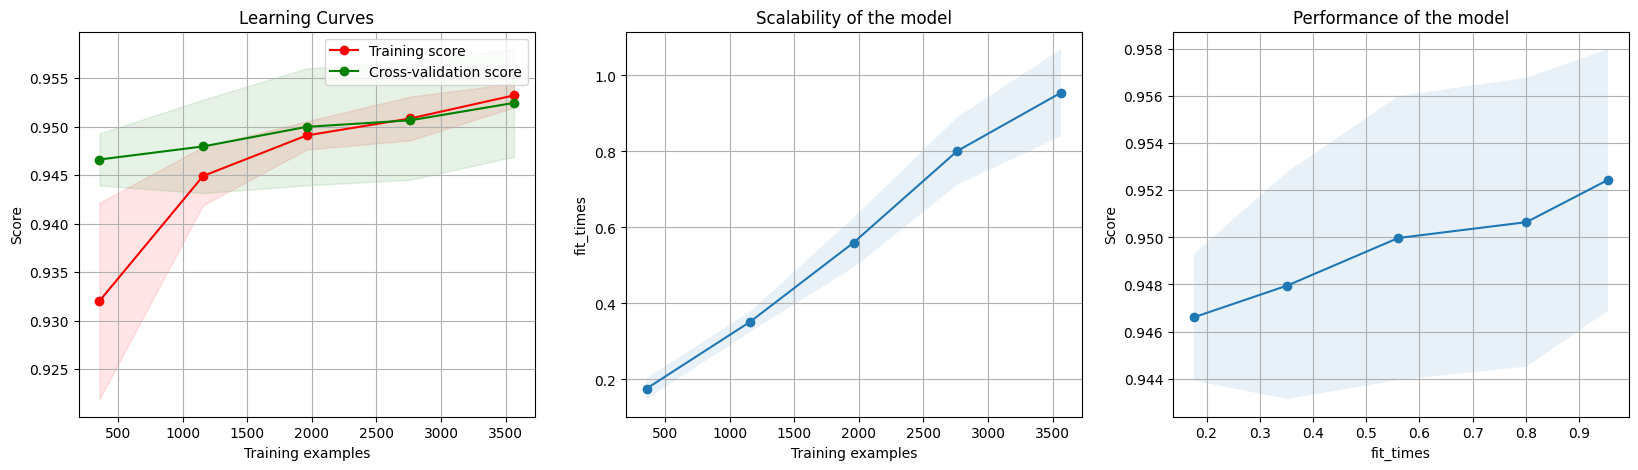

In [40]:
# plot learning curces
plot_learning_curve(best_classifier_3, 'Learning Curves',
                    X_train_final, y_train, n_jobs=-1)

In [41]:
# Final Pipeline
def final_pipeline(text):
    X_features, feature_names = featurizer.fit_transform(text)
    cleaned_text = X_test_cleaned_bow
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    predictions = best_classifier_3.predict(X_final)
    return predictions
y_test_pred = final_pipeline(X_test)


In [42]:
np.unique(y_test_pred,return_counts=True)

(array([0, 1]), array([934, 181]))

In [43]:
from sklearn import metrics
print('\nTest set classification report:\n\n',
      metrics.classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.98      0.95      0.97       966
           1       0.74      0.90      0.81       149

    accuracy                           0.94      1115
   macro avg       0.86      0.93      0.89      1115
weighted avg       0.95      0.94      0.95      1115

